## Observations and Insights 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how ='outer', on='Mouse ID')
# Display the data table for preview
pd.set_option('display.max_rows', None)
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
# Call unique values from Mouse ID column then take the length
unique_mice = combined_df['Mouse ID'].unique()
mice_num = len(unique_mice)
mice_num

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Use pd.df.duplicated to return boolean values, False if the id/timepoint combo isn't duplicated anywhere, True if it is
duplicate_time_mice = combined_df[['Mouse ID', 'Timepoint']].duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

duplicate_time_mice

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create dataframe with all mouse ids and the boolean list for duplicated timepoints
mice_check = pd.DataFrame({'Mouse ID': combined_df['Mouse ID'], 'Duplicated Time Point': duplicate_time_mice})

# pull out all mouse ids with duplicated timepoint values
bad_mice = mice_check.loc[mice_check['Duplicated Time Point'] == True]

# generate list of all unique ids with duplicated timepoints and print to see how many
bad_mice_id = bad_mice['Mouse ID'].unique()
print(bad_mice_id)

# pull all data from original dataframe with offending mouse id 
bad_data = combined_df.loc[combined_df['Mouse ID'] == bad_mice_id[0]]
bad_data

['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_df = combined_df.loc[combined_df['Mouse ID'] != bad_mice_id[0]]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(filtered_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# call drug regimen and tumor volume columns from filtered data, that's all that's needed here
regimen_tumorvol = filtered_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# use groupby objects with analysis functions to get analysis values for each regimen
rtv_mean = regimen_tumorvol.groupby(['Drug Regimen']).mean()
rtv_median = regimen_tumorvol.groupby(['Drug Regimen']).median()
rtv_std = regimen_tumorvol.groupby(['Drug Regimen']).std()
rtv_sem = regimen_tumorvol.groupby(['Drug Regimen']).sem()

#merge the dataframes, rename columns in the middle to prevent duplicate column names 
rtv_mm =pd.merge(rtv_mean, rtv_median, on='Drug Regimen')
rtv_mmstd = pd.merge(rtv_mm, rtv_std, on='Drug Regimen')

rtv_mmstd = rtv_mmstd.rename(columns={'Tumor Volume (mm3)_x': 'Mean Tumor Volume (mm3)',
                                      'Tumor Volume (mm3)_y': 'Median Tumor Volume (mm3)',
                                     'Tumor Volume (mm3)': 'Tumor Volume (mm3), STD'})

summary_stats = pd.merge(rtv_mmstd, rtv_sem, on='Drug Regimen')

# rename last column to fit
summary_stats = summary_stats.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3), SEM'})

summary_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),"Tumor Volume (mm3), STD","Tumor Volume (mm3), SEM"
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_alter = regimen_tumorvol.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'std', 'sem']})

summary_stats_alter

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


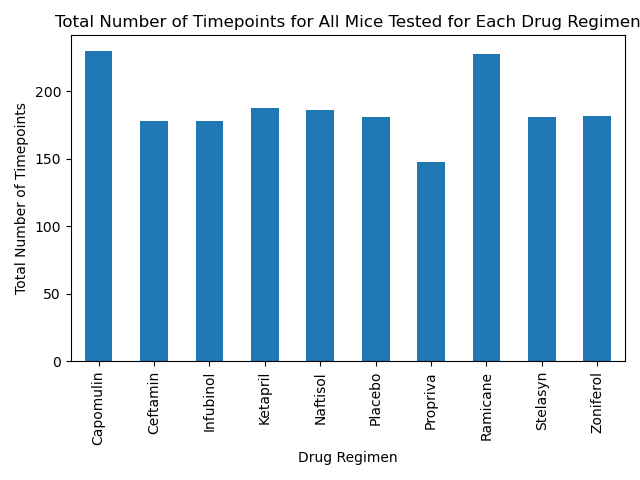

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# call drug regimen and timepoint columns for analysis
df_dr_tp = filtered_df[['Drug Regimen', 'Timepoint']]

# Group timepoints by drug regimen and count how many there are for each
timepoint_count = df_dr_tp.groupby(['Drug Regimen']).count()

# rename column to make dataframe more representative and reset index column to make next step easier
timepoint_count = timepoint_count.rename(columns={'Timepoint': 'Total Timepoint Count'})
timepoint_count.reset_index(inplace=True)

# use pd.df.plot() to plot bar chart with proper title and axis labels. remove legend since it isn;t useful here
timepoint_count.plot(x='Drug Regimen', y='Total Timepoint Count', kind='bar', 
                     title='Total Number of Timepoints for All Mice Tested for Each Drug Regimen',
                    ylabel='Total Number of Timepoints', legend=False)

# tighten up chart layout so it looks nicer
plt.tight_layout()

<IPython.core.display.Javascript object>


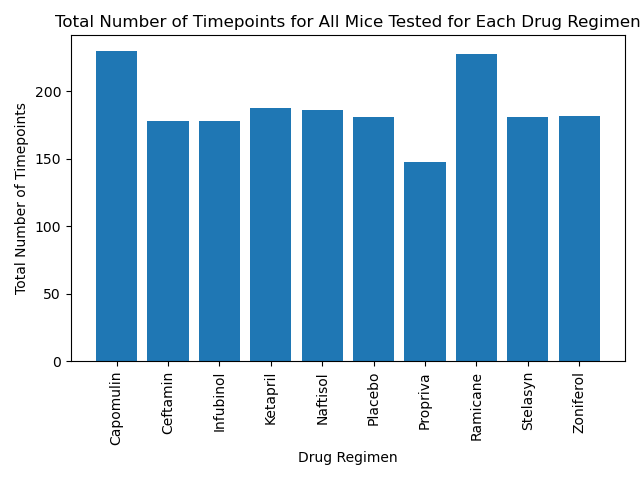

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# generate a new figure for the plot
plt.figure()

# use pyplot to generate a bar chart
plt.bar(timepoint_count['Drug Regimen'], timepoint_count['Total Timepoint Count'])

# adjust format, add title, and axis labels
plt.xticks(rotation='vertical')
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')

# tighten up layout for aesthetics
plt.tight_layout()

<IPython.core.display.Javascript object>


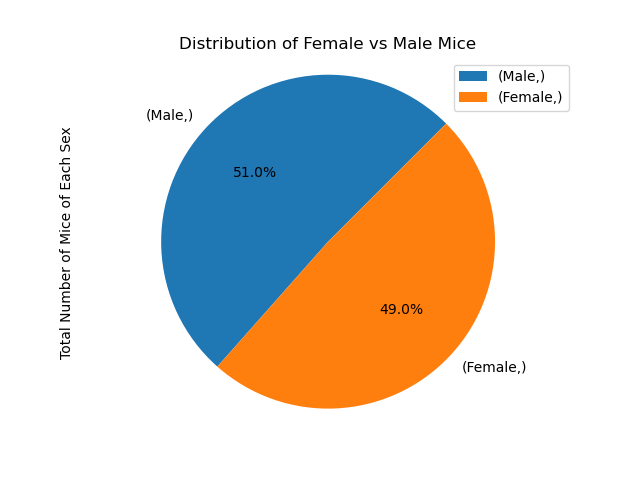

(-1.1054601616753736,
 1.1042365487930546,
 -1.1113356990969392,
 1.1025301389854145)

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# call the mouse sex column to a new dataframe
mice_sex_dist = filtered_df[['Sex']]

# generate dataframe with sexes and counts for each sex
sex_count_df = pd.DataFrame(mice_sex_dist.value_counts())
sex_count_df.columns = ['Total Number of Mice of Each Sex']

# plot using pandas plot function
sex_count_df.plot(kind='pie', y='Total Number of Mice of Each Sex', autopct='%1.1f%%', 
                 title='Distribution of Female vs Male Mice', startangle=45)
plt.axis('equal')

<IPython.core.display.Javascript object>


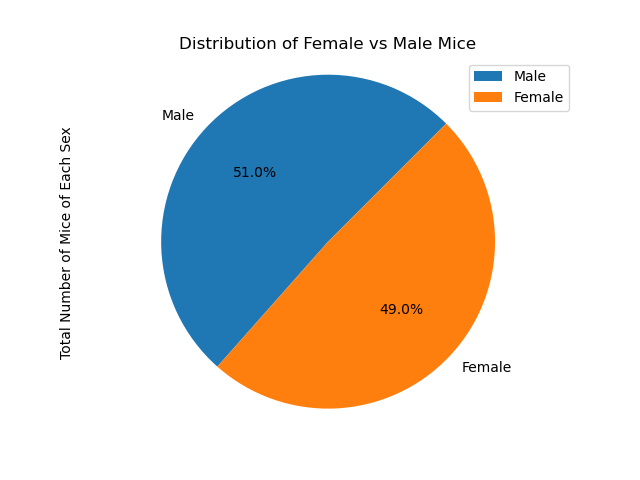

Text(0, 0.5, 'Total Number of Mice of Each Sex')

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# turn index back into column for easier referencing
sex_count_df.reset_index(inplace=True)

# generate lists with the dataframe column contents
sexes = sex_count_df['Sex'].tolist()
mouse_counts = sex_count_df['Total Number of Mice of Each Sex'].tolist()

# use pyplot to generate pie chart with title, legend, and labels to match previous pie chart
plt.figure()
plt.pie(mouse_counts, labels=sexes, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.legend()
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Total Number of Mice of Each Sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
